# EPILEPTIC SEIZURE PROJECT 

Objective: Categorize brain activity to recognize an actual Epileptic Seizure

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# About the data

The response variable is y in column 179, the Explanatory variables X1, X2, ..., X178

y contains the category of the 178-dimensional input vector. Specifically y in {1, 2, 3, 4, 5}:

5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open

4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed

3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area

2 - They recorder the EEG from the area where the tumor was located

1 - Recording of seizure activity

Data and data description source: http://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition

# Loading data

In [2]:
epi=pd.read_csv('data.csv')

# Taking a look at data

In [3]:
epi.head(5)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


# Statistics

In [4]:
epi.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


# Descriptive Data Analytics

In [5]:
# droping the Unnamed:0 column
epi.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
print(epi.shape)

(11500, 179)


In [7]:
# Finding not null values
epi.isnull().values.any()

False

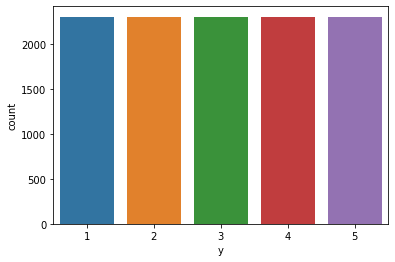

In [8]:
ax = sns.countplot(x= epi['y'], data=epi,label = "Count")

In [9]:
#Feature set
X = epi.iloc[:,1:179].values
X.shape

(11500, 178)

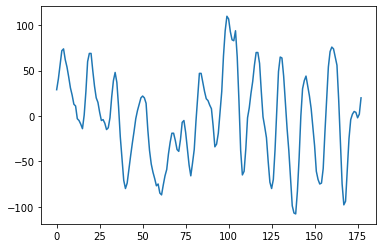

In [10]:
# plotting an epileptic wave form 
plt.plot(range(178), epi.iloc[11499,0:178])
plt.show()

Text(0.5, 0, 'Samples')

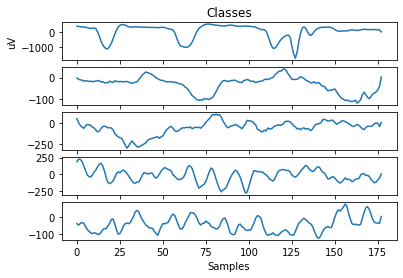

In [11]:
#plotting the first record of each category
plt.subplot(511)
plt.plot(X[1,:])
plt.title('Classes')
plt.ylabel('uV')
plt.subplot(512)
plt.plot(X[7,:])
plt.subplot(513)
plt.plot(X[12,:])
plt.subplot(514)
plt.plot(X[0,:])
plt.subplot(515)
plt.plot(X[2,:])
plt.xlabel('Samples')

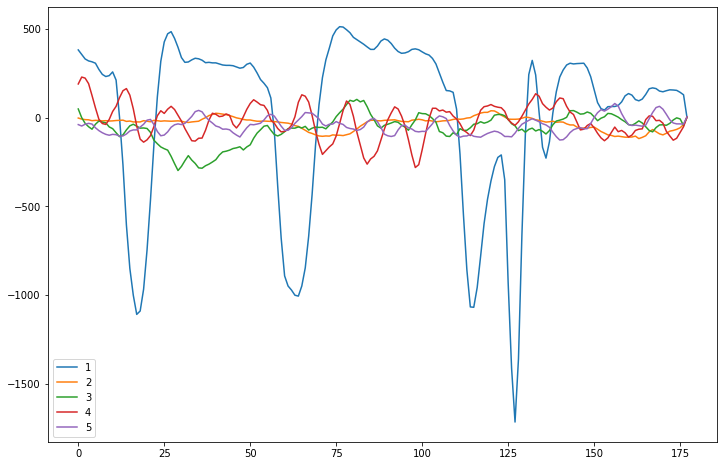

In [12]:
#plotting the first record of each category
plt.figure(figsize=(12,8))
plt.plot(X[1,:],label='1')
plt.plot(X[7,:],label='2')
plt.plot(X[12,:],label='3')
plt.plot(X[0,:],label='4')
plt.plot(X[2,:],label='5')
plt.legend()
plt.show()

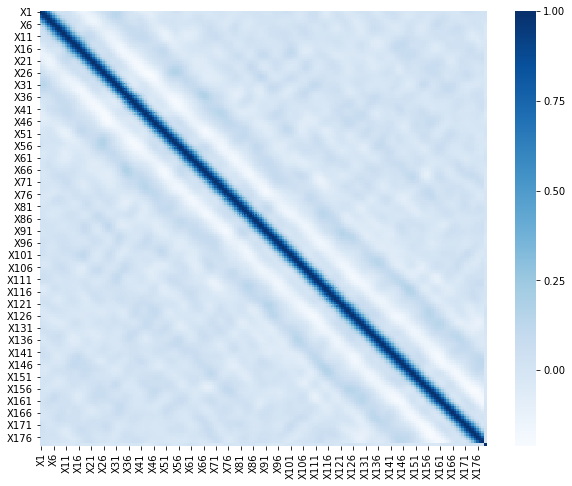

In [13]:
plt.figure(figsize=(10,8))
Corr=epi[epi.columns].corr()
sns.heatmap(Corr,cmap="Blues")

# Training

In [14]:
X = epi.drop('y',axis=1)
y = epi['y']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Decision Tree

In [16]:
Dt = DecisionTreeClassifier()
Dt.fit(X_train,y_train)
pred_t=Dt.predict(X_test)

In [17]:
print("Accuracy score for Decision tree: ",accuracy_score(y_test,pred_t))

Accuracy score for Decision tree:  0.47507246376811596


# SVM

In [18]:
svc = svm.SVC()
svc.fit(X_train,y_train)
pred_s=svc.predict(X_test)

In [19]:
print("Accuracy score for SVM: ",accuracy_score(y_test,pred_s))

Accuracy score for SVM:  0.1907246376811594


# Random Forest

In [20]:
rf=RandomForestClassifier(n_estimators=90)
rf.fit(X_train,y_train)
pre_r=rf.predict(X_test)

In [21]:
print("Accuracy score for Random Forest: ",accuracy_score(y_test,pre_r))

Accuracy score for Random Forest:  0.6895652173913044


# Standardization

In [22]:
J=StandardScaler().fit_transform(X)
pd_std=pd.DataFrame(data=J)
pd_std

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,0.885051,1.209929,1.462764,1.439539,1.242366,0.818262,0.380910,-0.014267,-0.163196,-0.198415,...,0.105907,-0.041630,-0.020282,-0.107131,-0.375743,-0.535944,-0.693858,-0.634144,-0.433290,-0.235399
1,2.400577,2.366190,2.239441,2.109257,2.037441,1.996033,1.941660,1.719102,1.546403,1.484569,...,1.074264,1.057700,0.972841,0.943023,0.982911,1.018615,1.029295,1.023429,0.954241,0.856537
2,-0.123287,-0.169154,-0.225131,-0.172743,-0.149016,-0.179743,-0.312756,-0.409056,-0.484131,-0.547478,...,0.233004,0.407820,0.455214,0.361582,0.193824,0.008151,-0.103237,-0.136872,-0.138593,-0.144405
3,-0.564057,-0.542530,-0.524794,-0.513803,-0.503073,-0.545472,-0.591462,-0.575607,-0.496475,-0.453979,...,-0.426689,-0.436417,-0.417531,-0.397851,-0.375743,-0.428321,-0.389414,-0.364021,-0.347337,-0.320328
4,0.015586,-0.325731,-0.537025,-0.575814,-0.434746,-0.254129,-0.058825,0.041250,-0.089134,-0.329314,...,0.118012,0.085916,0.082040,0.005598,-0.108758,-0.165242,-0.316347,-0.431551,-0.470127,-0.368858
5,0.402015,0.234333,0.172380,0.155914,0.149137,0.161190,0.195107,0.287993,0.361410,0.449846,...,0.021176,-0.011262,-0.116585,-0.172394,-0.239284,-0.278844,-0.310258,-0.290351,-0.267523,-0.259664
6,-0.262159,0.011512,0.380309,0.745018,0.888309,0.843058,0.678196,0.485387,0.268833,0.038450,...,-0.771666,-0.697584,-0.525872,-0.391918,-0.286748,-0.165242,-0.078881,0.145530,0.487637,0.850470
7,0.075966,0.053667,0.013376,-0.011515,-0.024786,-0.061966,-0.052631,-0.057447,-0.070618,-0.067516,...,-0.348010,-0.418196,-0.477720,-0.498713,-0.441006,-0.374509,-0.358970,-0.327186,-0.273663,-0.162603
8,-1.608623,-1.415749,-1.252546,-1.127711,-1.049688,-0.991785,-0.932102,-0.816181,-0.687802,-0.535012,...,-2.278671,-2.367837,-2.211171,-1.916718,-1.586072,-1.271370,-0.980035,-0.689396,-0.408732,-0.168670
9,0.118231,0.156045,0.141802,0.075300,0.012484,-0.006177,0.009303,0.065924,0.194771,0.294014,...,0.450884,0.359230,0.256589,0.142058,0.051432,-0.021744,-0.036259,-0.014089,-0.015803,0.007253


# Feature extraction using PCA

In [23]:
mean_k=np.mean(J,axis=0)
matrix=(J-mean_k).T.dot((J-mean_k))/(J.shape[0]-1)
covariance = np.cov(J,rowvar=False)

# Finding Eigen values

In [24]:
covariance=np.cov(J.T)
eigen_values,eigen_vectors=np.linalg.eig(covariance)
# print(eigen_vectors)
# print(eigen_values)

# Sorting eigen vectors

In [25]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i])
for i in range(len(eigen_values))]
print(type(eigen_pairs))
eigen_pairs.sort()
eigen_pairs.reverse()

<class 'list'>


# Finding number of significant components(ones with higher % of variance)

In [26]:
total=sum(eigen_values)
# print("\n",total)
exp_variance=[(i/total)*100 for i in sorted(eigen_values,reverse=True)]
# print("\n\n1. Explained variance\n",exp_variance)
cum_exp_var=np.cumsum(exp_variance)
# print("\n\n2. Cumulative explained variance\n",cum_exp_var)
print("\n\n3. % of variance of first comp.\n",exp_variance[0:3])
print("\n\n4. Sum of %\n",sum(exp_variance[0:3]))



3. % of variance of first comp.
 [5.608401764187334, 5.2396150107316295, 4.964632615471128]


4. Sum of %
 15.812649390390092


In [27]:
pca=PCA(n_components=3)

In [28]:
pca.fit(pd_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [29]:
pca_feat=pca.transform(pd_std)

In [30]:
print(pca_feat.shape)

(11500, 3)


In [31]:
pca_df=pd.DataFrame(data=pca_feat, columns = ['PC1','PC2','PC3'])
pca_df.head()

,PC1,PC2,PC3
0,-0.143629,-1.152952,0.835757
1,-1.706166,-3.636680,6.122386
2,0.496865,-0.263428,0.937926
3,-0.171318,0.252143,-0.068685
4,-0.236520,0.122106,0.485700


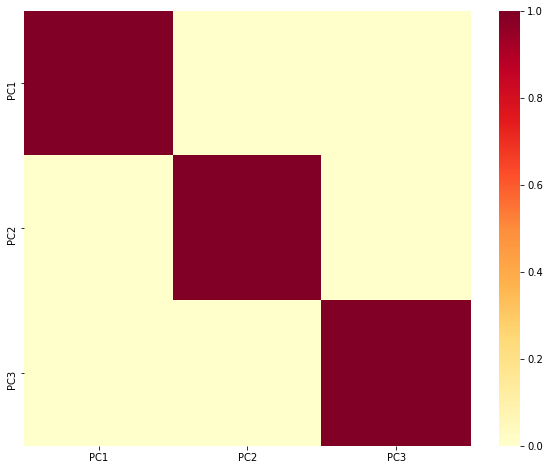

In [32]:
plt.figure(figsize=(10,8))
Corr=pca_df[pca_df.columns].corr()
sns.heatmap(Corr,cmap="YlOrRd")

In [33]:
y=epi.iloc[:,178:179]
y_pd=pd.DataFrame(data=y)
pca_df["result"]=y_pd["y"]
x=pca_df.iloc[:,0:3]
y=pca_df.iloc[:,3:4]

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

# SVM

In [35]:
SVM=svm.SVC(kernel='rbf',gamma='auto',class_weight='balanced')
SVM.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
pred_svm=SVM.predict(x_test)

In [37]:
print(pred_svm[0:5])
print(y_test[0:5])

[1 5 4 5 5]
      result
3176       1
6551       4
7726       4
2488       2
854        3


In [38]:
print("Accuracy: SVM",accuracy_score(y_test,pred_svm))

Accuracy: SVM 0.4391304347826087


In [39]:
print("Classification report for SVM\n",classification_report(y_test,pred_svm))

Classification report for SVM
               precision    recall  f1-score   support

           1       0.90      0.91      0.91       460
           2       0.44      0.17      0.25       460
           3       0.29      0.12      0.17       460
           4       0.29      0.17      0.22       460
           5       0.32      0.81      0.45       460

    accuracy                           0.44      2300
   macro avg       0.45      0.44      0.40      2300
weighted avg       0.45      0.44      0.40      2300



In [40]:
print("Confusion matrix for SVM\n",confusion_matrix(y_test,pred_svm))


Confusion matrix for SVM
 [[420  14   7  11   8]
 [ 34  80  41  67 238]
 [ 11  37  56  80 276]
 [  3  37  52  80 288]
 [  0  13  34  39 374]]


# Decision Tree

In [41]:
Tree=DecisionTreeClassifier(criterion='gini',min_samples_leaf=10)
Tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [42]:
Tree_pred=Tree.predict(x_test)

In [43]:
print(Tree_pred[0:5])
print(y_test[0:5])

[1 5 3 3 4]
      result
3176       1
6551       4
7726       4
2488       2
854        3


In [44]:
print("Accuracy: Decision Tree:",accuracy_score(y_test,Tree_pred))

Accuracy: Decision Tree: 0.38782608695652177


In [45]:
print("Confusion matrix for Decision Tree\n",confusion_matrix(y_test,Tree_pred))

Confusion matrix for Decision Tree
 [[396  35  14  12   3]
 [ 43 119 103 104  91]
 [ 14 114 114 127  91]
 [  8  88 125 127 112]
 [  1  96 107 120 136]]


In [46]:
print("Classification report for Decision Tree\n",classification_report(y_test,Tree_pred))

Classification report for Decision Tree
               precision    recall  f1-score   support

           1       0.86      0.86      0.86       460
           2       0.26      0.26      0.26       460
           3       0.25      0.25      0.25       460
           4       0.26      0.28      0.27       460
           5       0.31      0.30      0.30       460

    accuracy                           0.39      2300
   macro avg       0.39      0.39      0.39      2300
weighted avg       0.39      0.39      0.39      2300



# Random Forest

In [47]:
Random_f=RandomForestClassifier(n_estimators=50)
Random_f.fit(x_train,y_train)
pred_rf=Random_f.predict(x_test)

In [48]:
print(pred_rf[0:5])
print(y_test[0:5])

[1 3 4 3 3]
      result
3176       1
6551       4
7726       4
2488       2
854        3


In [49]:
print("Acuracy: Random Forest",accuracy_score(y_test,pred_rf))

Acuracy: Random Forest 0.40869565217391307


In [50]:
print("Confusion_matrix for Random Forest\n",confusion_matrix(y_test,pred_rf))

Confusion_matrix for Random Forest
 [[419  19  10   9   3]
 [ 46 116  96  88 114]
 [ 14  92 122 131 101]
 [  5  99 107 121 128]
 [  1  82 103 112 162]]


In [51]:
print("Classification Report for Random Forest\n",classification_report(y_test,pred_rf))

Classification Report for Random Forest
               precision    recall  f1-score   support

           1       0.86      0.91      0.89       460
           2       0.28      0.25      0.27       460
           3       0.28      0.27      0.27       460
           4       0.26      0.26      0.26       460
           5       0.32      0.35      0.33       460

    accuracy                           0.41      2300
   macro avg       0.40      0.41      0.40      2300
weighted avg       0.40      0.41      0.40      2300



# Checking data linearity

In [52]:
Xl=pd_std.iloc[:,0:178]
Yl=epi.iloc[:,178:179]

In [53]:
reg=LinearRegression().fit(Xl,Yl)

In [54]:
print("Non-linearity: ",r2_score(reg.predict(Xl),Yl)) # data is non-linear

Non-linearity:  -26.509826770513737


# Extracting features through kernel PCA

In [55]:
ker_pca=KernelPCA(n_components=35,kernel='linear')
kp=ker_pca.fit_transform(J)
kp.shape

(11500, 35)

In [56]:
ker_pca_df=pd.DataFrame(data=kp,columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35'])

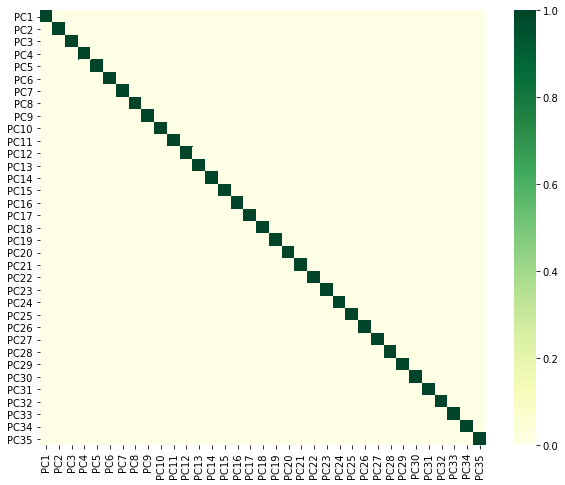

In [57]:
plt.figure(figsize=(10,8))
Corr=ker_pca_df[ker_pca_df.columns].corr()
sns.heatmap(Corr,cmap="YlGn")

In [58]:
y=epi.iloc[:,178:179]
y_pd=pd.DataFrame(data=y)
ker_pca_df["result"]=y_pd["y"]

In [59]:
x=ker_pca_df.iloc[:,0:35]
y=ker_pca_df.iloc[:,35:36]

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

# Random Forest

In [61]:
Random=RandomForestClassifier(n_estimators=40)
Random.fit(x_train,y_train)
kp_pred=Random.predict(x_test)

In [62]:
print(kp_pred[0:5])
print(y_test[0:5])

[1 4 4 2 3]
      result
3176       1
6551       4
7726       4
2488       2
854        3


Text(0, 0.5, 'Predicted values')

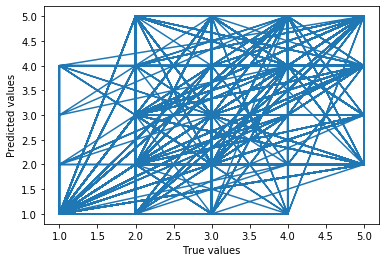

In [63]:
plt.plot(y_test,kp_pred)
plt.xlabel("True values")
plt.ylabel("Predicted values")

In [64]:
acc=[]
cv=[]
name=['Random Forest','Decision Tree','SVM']
name

['Random Forest', 'Decision Tree', 'SVM']

In [65]:
print("Accuracy: Random forest",accuracy_score(y_test,kp_pred))
acc.append(accuracy_score(y_test,kp_pred))

Accuracy: Random forest 0.6856521739130435


In [66]:
print("Cross-Validation score: Random forest",cross_val_score(Random,x,y,cv=10).mean())
cv.append(cross_val_score(Random,x,y,cv=10).mean())

Cross-Validation score: Random forest 0.7


In [67]:
print("Confusion matrix for Random Forest\n",confusion_matrix(y_test,kp_pred))

Confusion matrix for Random Forest
 [[447   4   2   7   0]
 [ 30 236 130  22  42]
 [ 14 128 245  27  46]
 [  7   7   5 359  82]
 [  0  41  37  92 290]]


In [68]:
print("Classification report for Random Forest\n",classification_report(y_test,kp_pred))

Classification report for Random Forest
               precision    recall  f1-score   support

           1       0.90      0.97      0.93       460
           2       0.57      0.51      0.54       460
           3       0.58      0.53      0.56       460
           4       0.71      0.78      0.74       460
           5       0.63      0.63      0.63       460

    accuracy                           0.69      2300
   macro avg       0.68      0.69      0.68      2300
weighted avg       0.68      0.69      0.68      2300



# Decision Tree

In [69]:
D_Tree=DecisionTreeClassifier(criterion='gini',min_samples_leaf=10)
D_Tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [70]:
Tree_predicted=D_Tree.predict(x_test)

In [71]:
print(Tree_predicted[0:5])
print(y_test[0:5])

[1 4 5 4 2]
      result
3176       1
6551       4
7726       4
2488       2
854        3


Text(0, 0.5, 'Predicted values')

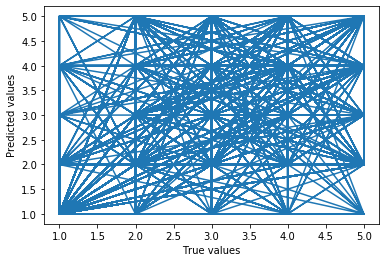

In [72]:
plt.plot(y_test,Tree_predicted)
plt.xlabel("True values")
plt.ylabel("Predicted values")

In [73]:
print("Accuracy: Decision Tree",accuracy_score(y_test,Tree_predicted))
acc.append(accuracy_score(y_test,Tree_predicted))

Accuracy: Decision Tree 0.5317391304347826


In [74]:
print("Cross validation score: Decision Tree",cross_val_score(D_Tree,x,y,cv=10).mean())
cv.append(cross_val_score(D_Tree,x,y,cv=10).mean())

Cross validation score: Decision Tree 0.5368695652173913


In [75]:
print("Confusion matrix for Decision Tree\n",confusion_matrix(y_test,Tree_predicted))

Confusion matrix for Decision Tree
 [[395  30  11  17   7]
 [ 26 178 133  45  78]
 [ 16 135 190  34  85]
 [ 22  43  29 271  95]
 [  7  81  75 108 189]]


In [76]:
print("Classification report for Decision Tree\n",classification_report(y_test,Tree_predicted))

Classification report for Decision Tree
               precision    recall  f1-score   support

           1       0.85      0.86      0.85       460
           2       0.38      0.39      0.38       460
           3       0.43      0.41      0.42       460
           4       0.57      0.59      0.58       460
           5       0.42      0.41      0.41       460

    accuracy                           0.53      2300
   macro avg       0.53      0.53      0.53      2300
weighted avg       0.53      0.53      0.53      2300



# SVM

In [77]:
SV=svm.SVC(kernel='rbf',gamma='auto',class_weight='balanced')
SV.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [78]:
y_pred=SV.predict(x_test)

In [79]:
print(y_pred[0:5])
print(y_test[0:5])

[1 5 5 2 5]
      result
3176       1
6551       4
7726       4
2488       2
854        3


Text(0, 0.5, 'Predicted values')

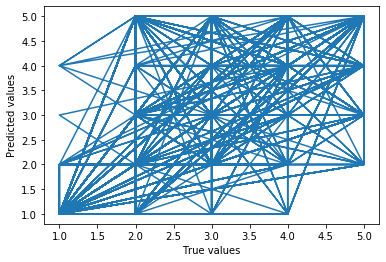

In [80]:
plt.plot(y_test,y_pred)
plt.xlabel("True values")
plt.ylabel("Predicted values")

In [81]:
print("Accuracy:SVM",accuracy_score(y_test,y_pred))
acc.append(accuracy_score(y_test,y_pred))

Accuracy:SVM 0.6469565217391304


In [82]:
print("Cross validation score: SVM",cross_val_score(SV,x,y,cv=10).mean())
cv.append(cross_val_score(SV,x,y,cv=10).mean())

Cross validation score: SVM 0.6487826086956521


In [83]:
print("Confusion matrix for SVM\n",confusion_matrix(y_test,y_pred))

Confusion matrix for SVM
 [[449   7   1   3   0]
 [ 33 146 107  10 164]
 [  7  65 197  12 179]
 [  7  18  11 303 121]
 [  0  10  30  27 393]]


In [84]:
print("Classification report for SVM\n",classification_report(y_test,y_pred))

Classification report for SVM
               precision    recall  f1-score   support

           1       0.91      0.98      0.94       460
           2       0.59      0.32      0.41       460
           3       0.57      0.43      0.49       460
           4       0.85      0.66      0.74       460
           5       0.46      0.85      0.60       460

    accuracy                           0.65      2300
   macro avg       0.68      0.65      0.64      2300
weighted avg       0.68      0.65      0.64      2300



# Comparison

In [85]:
comparison_table=pd.DataFrame(name,columns=['Algorithm'])
comparison_table["Accuracy score"]=acc
comparison_table["Cross-validation score"]=cv
comparison_table

,Algorithm,Accuracy score,Cross-validation score
0,Random Forest,0.685652,0.697478
1,Decision Tree,0.531739,0.535565
2,SVM,0.646957,0.648783


# Result

Comparison shows Random Forest is the Victor!

# Visualizing the final result obtained from Random forest

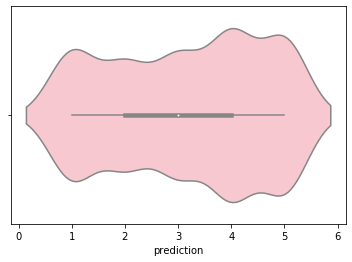

In [86]:
a=pd.DataFrame(y_test)
k=pd.DataFrame(kp_pred,columns=['Prediction'])
a["prediction"]=k["Prediction"]
sns.violinplot(a["prediction"],color="pink")

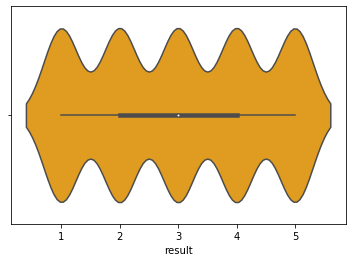

In [87]:
sns.violinplot(a["result"],color="orange")

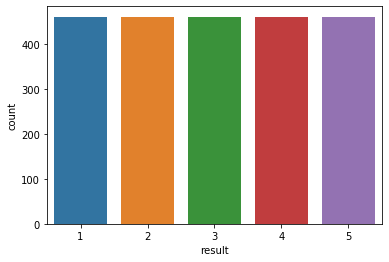

In [88]:
sns.countplot(a["result"])

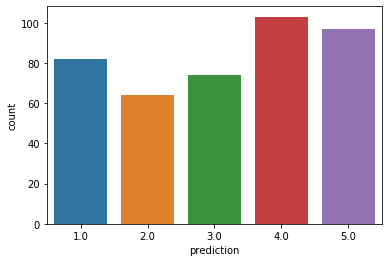

In [89]:
sns.countplot(a["prediction"])